**BILO BAGE BILIYAN DA KI KAREGI BAGE BAGE BILIYAN DA KI KAREGI**
<BR>ANS: *** *********

**Add all imports here**
**DEKH LENA SAARE IMPORTS SAARE YAHAN DAALNE HAIN VVVVVVVVVVVVVIMP**

In [1]:
import numpy as np
import pandas as pd
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# **Loading the dataset**

In [2]:
uploaded = files.upload()
data = pd.read_csv("cardio_train.csv")
data.drop("id",axis=1,inplace=True)

In [ ]:
display(data)

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      18393       2     168    62.0    110     80            1     1      0   
1      20228       1     156    85.0    140     90            3     1      0   
2      18857       1     165    64.0    130     70            3     1      0   
3      17623       2     169    82.0    150    100            1     1      0   
4      17474       1     156    56.0    100     60            1     1      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
69995  19240       2     168    76.0    120     80            1     1      1   
69996  22601       1     158   126.0    140     90            2     2      0   
69997  19066       2     183   105.0    180     90            3     1      0   
69998  22431       1     163    72.0    135     80            1     2      0   
69999  20540       1     170    72.0    120     80            2     1      0   

       alco  active  PP         MAP  cardio  
0         0       1  30   90.000000       0  
1         0       1  50  106.666667       1  
2         0       0  60   90.000000       1  
3         0       1  50  116.666667       1  
4         0       0  40   73.333333       0  
...     ...     ...  ..         ...     ...  
69995     0       1  40   93.333333       0  
69996     0       1  50  106.666667       1  
69997     1       0  90  120.000000       1  
69998     0       0  55   98.333333       1  
69999     0       1  40   93.333333       0  

[70000 rows x 14 columns]

# **Exploratory Data Analysis**

**Multi-variate Analysis**

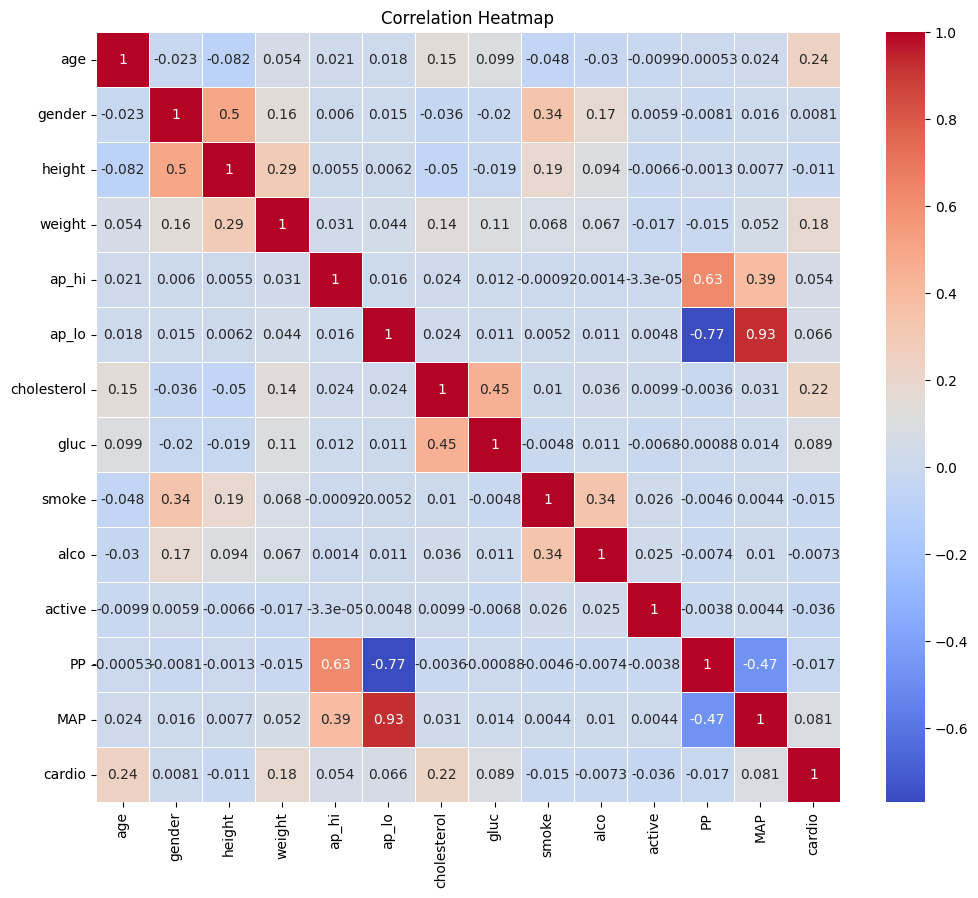

In [ ]:
# Corelation HeatMap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


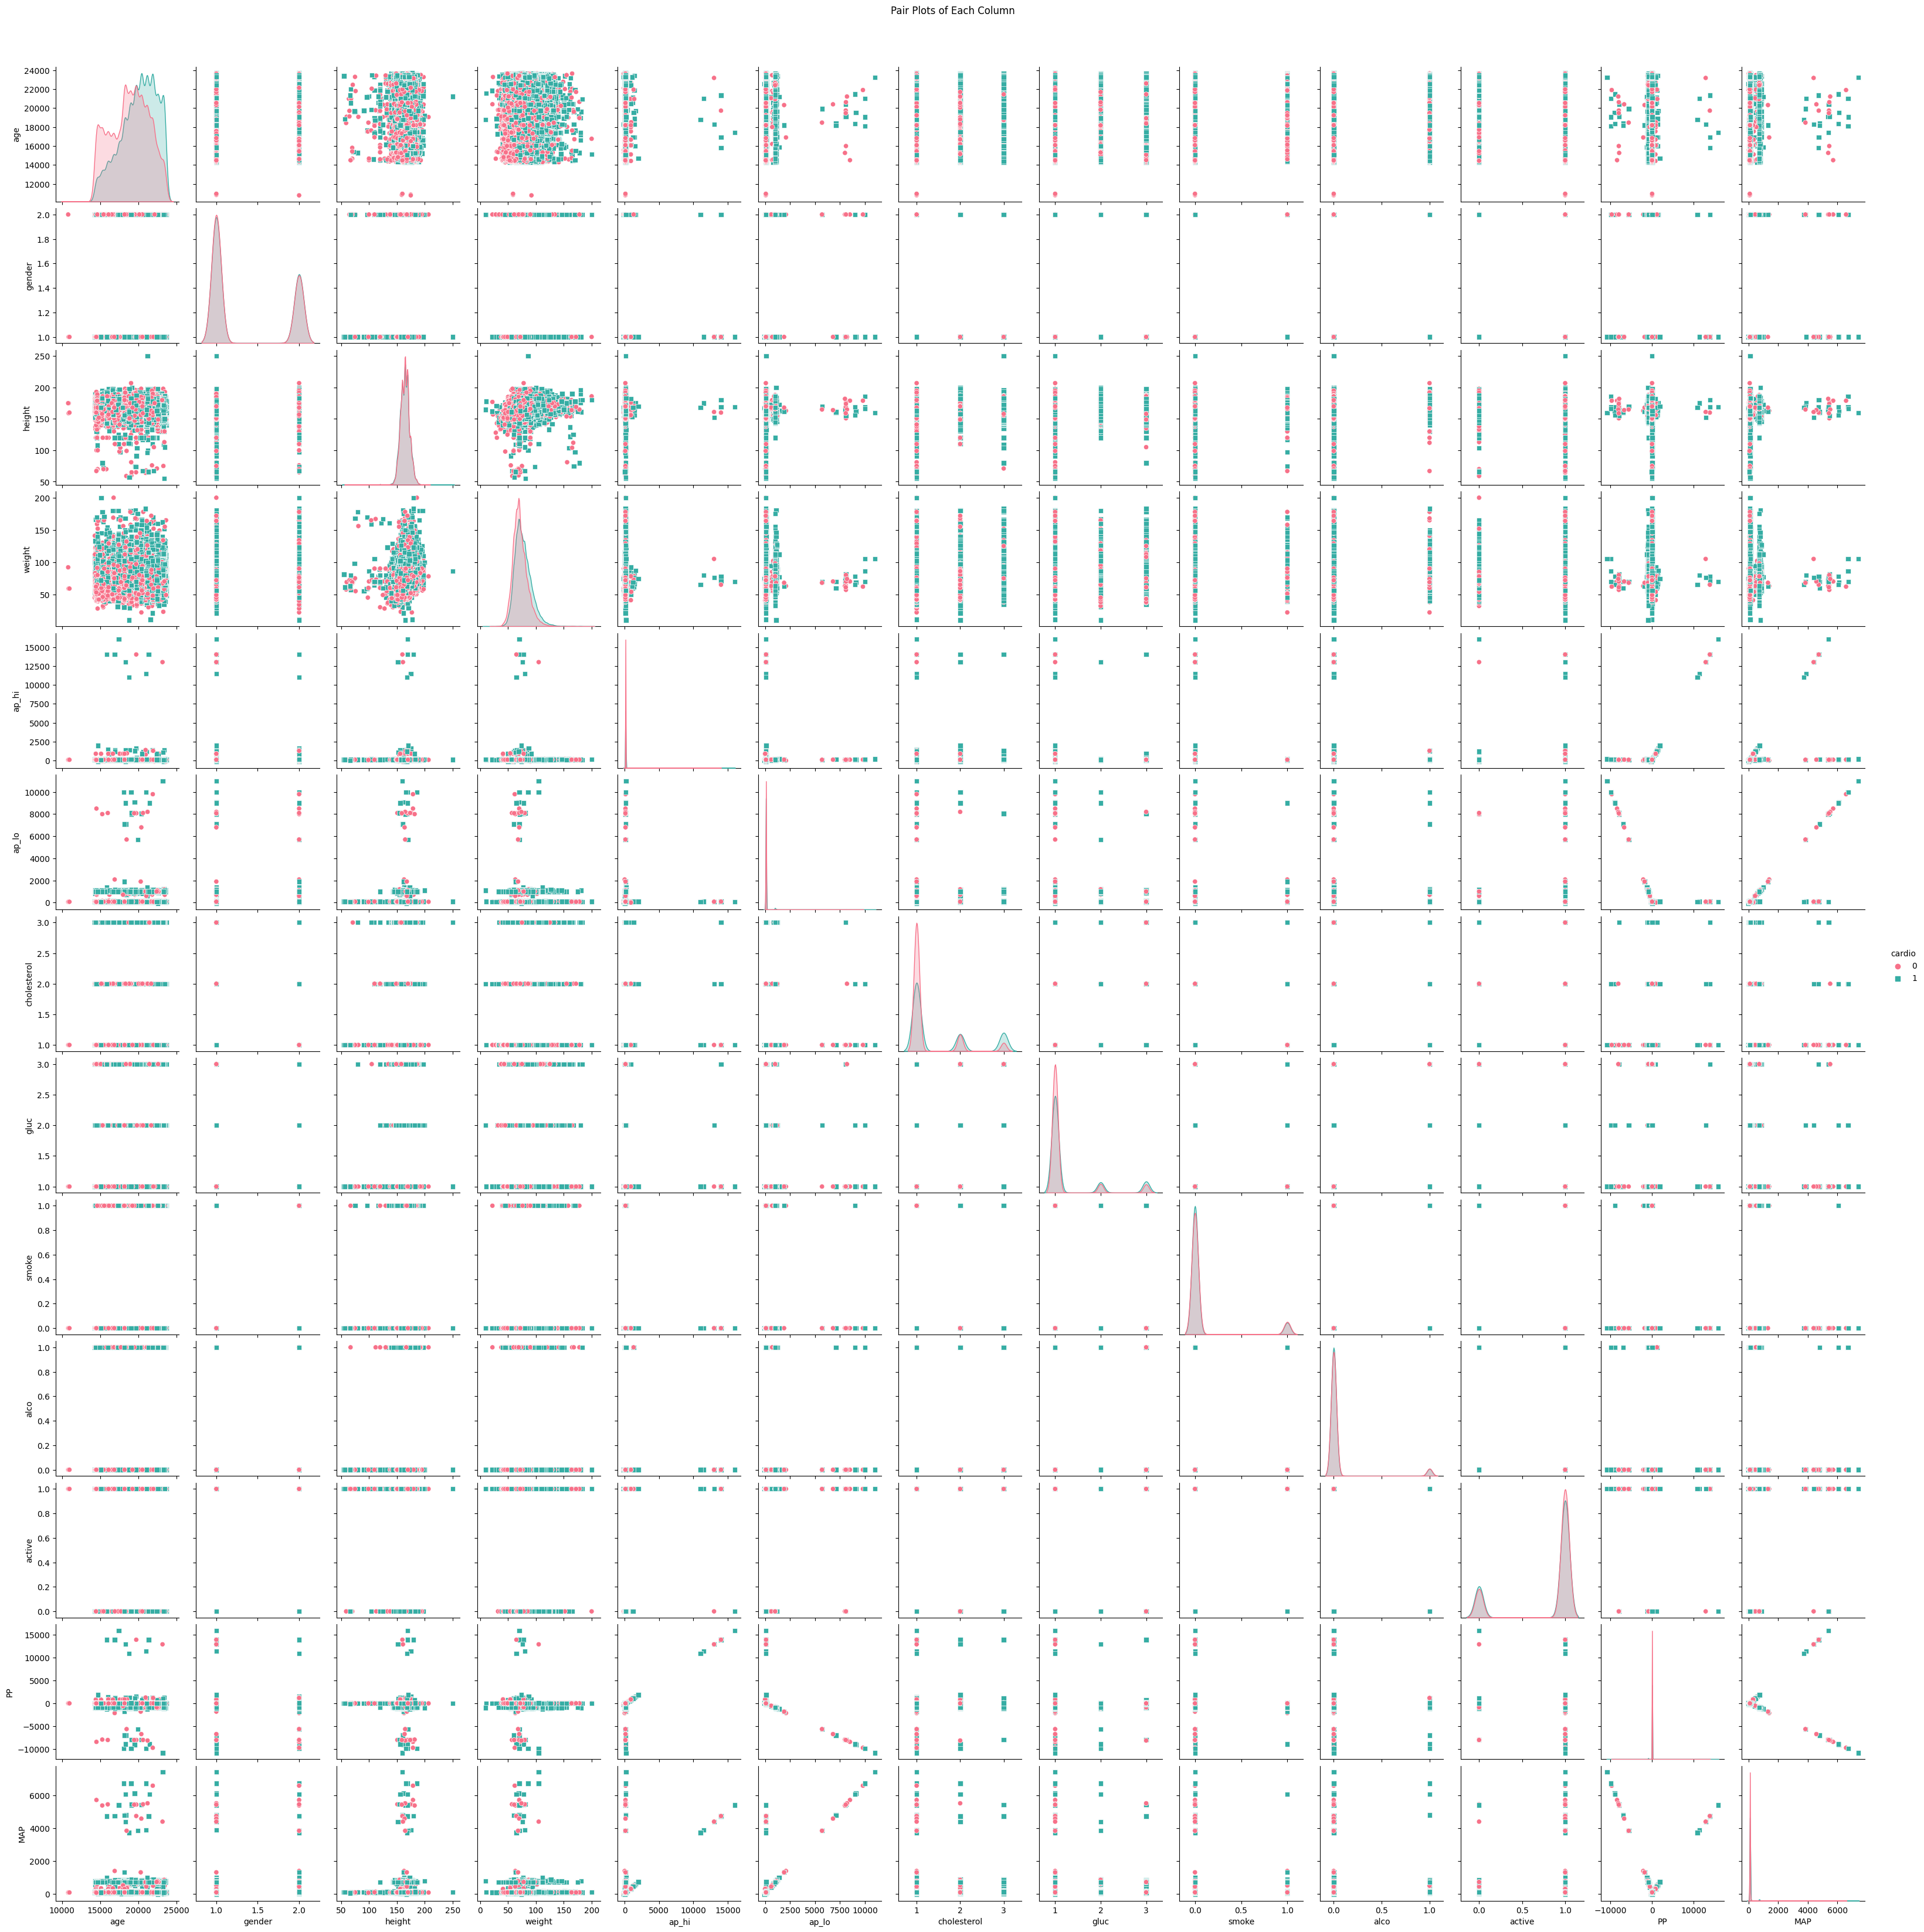

In [ ]:
sns.pairplot(data, diag_kind='kde', hue='cardio', palette='husl', markers=['o', 's'])
plt.suptitle("Pair Plots of Each Column", y=1.02)
plt.show()

**Uni-Variate Analysis**

Box-Plots

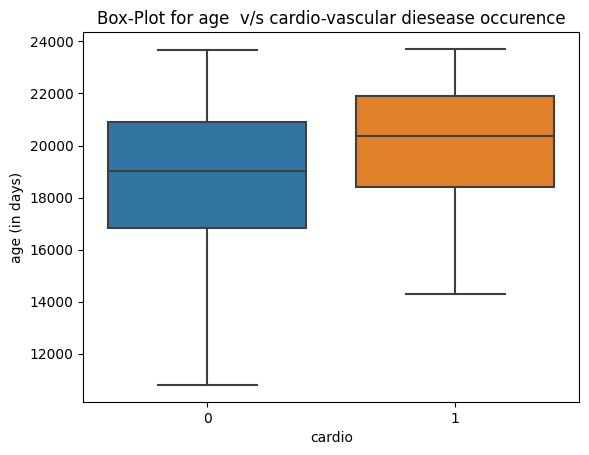

In [ ]:
sns.boxplot(x="cardio",y="age",data=data)
plt.title("Box-Plot for age  v/s cardio-vascular diesease occurence")
plt.ylabel("age (in days)")
plt.show()

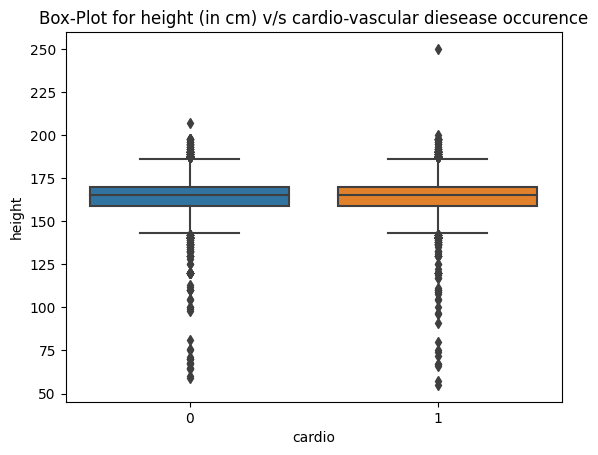

In [ ]:
sns.boxplot(x="cardio",y="height",data=data)
plt.title("Box-Plot for height (in cm) v/s cardio-vascular diesease occurence")
plt.show()

In [ ]:
sns.boxplot(x="cardio",y="weight",data=data)
plt.title("Box-Plot for weight v/s cardio-vascular diesease occurence")
plt.show()

ValueError: ignored

******************VERY HIGH OUTLIERS IN AP_HI    ****************************

In [ ]:
sns.boxplot(x="cardio",y="ap_hi (in mmHg)",data=data)
plt.title("Box-Plot for Systolic Blood Pressure v/s cardio-vascular diesease occurence")

In [ ]:
sns.boxplot(x="cardio",y="ap_lo",data=data)
plt.title("Box-Plot for Dyastolic Blood Pressure v/s cardio-vascular diesease occurence")
plt.show()
print(data["ap_lo"])

In [ ]:
boxplt = sns.boxplot(x="cardio",y="PP",data=data)
plt.title("Box-Plot for Pulse Pressure v/s cardio-vascular diesease occurence")
boxplt.set_ylim(-300,400)
plt.show()

In [ ]:
boxplt = sns.boxplot(x="cardio",y="MAP",data=data)
plt.title("Box-Plot for Mean Arterial v/s cardio-vascular diesease occurence")
boxplt.set_ylim(-10,200)
plt.show()

**People With CVD**

### **Histograms**

Histogram showing relative frequencies of the people with and without CVD,in different age brackets.

<Figure size 640x480 with 0 Axes>

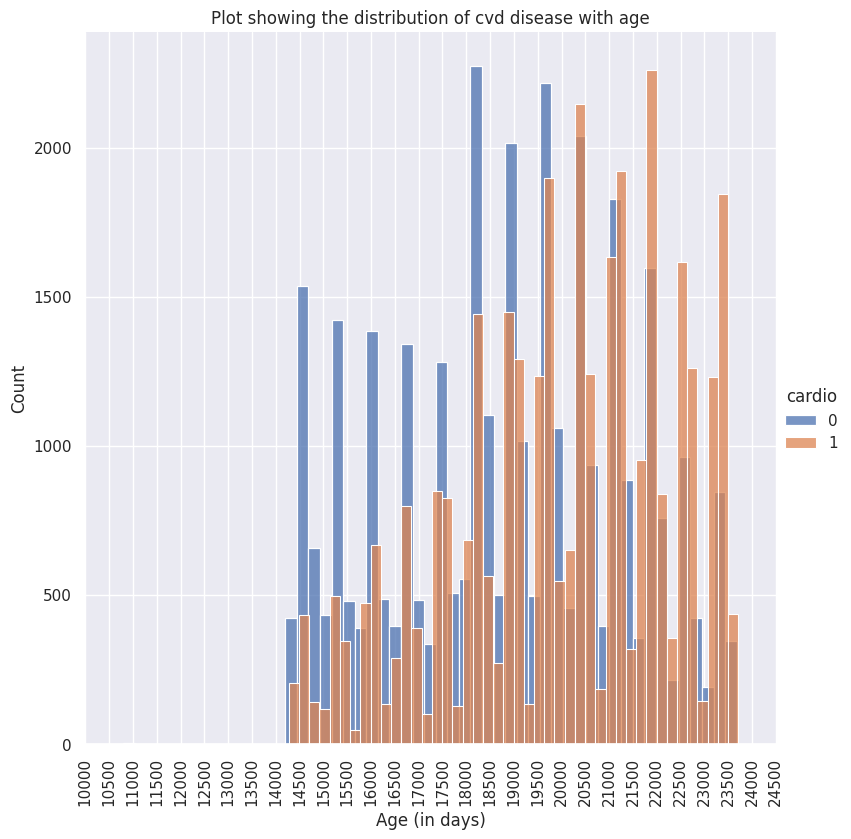

In [ ]:
sns.set(font_scale=1.0)
plt.figure(dpi=100)
sns.FacetGrid(data,hue="cardio",height=8).map(sns.histplot,'age').add_legend()
plt.title("Plot showing the distribution of cvd disease with age")
plt.xticks(rotation=90)
plt.xticks(np.arange(10000,25000,500))
plt.xlabel("Age (in days)")
plt.show()

Histogram showing relative frequencies of the people with and without CVD,in different height brackets.

<Figure size 640x480 with 0 Axes>

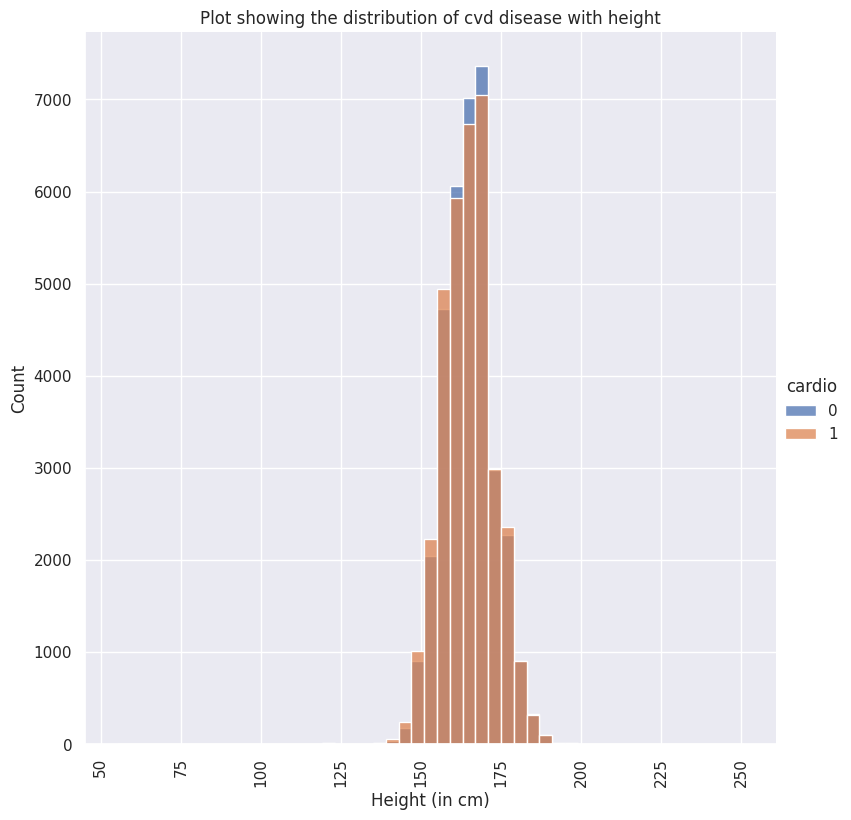

In [ ]:
sns.set(font_scale=1.0)
plt.figure(dpi=100)
sns.FacetGrid(data,hue="cardio",height=8).map(sns.histplot,'height',binwidth=4.0).add_legend()
plt.title("Plot showing the distribution of cvd disease with height")
plt.xticks(rotation=90)
plt.xlabel("Height (in cm)")
plt.show()

Histogram showing relative frequencies of the people with and without CVD,in different weight brackets.

<Figure size 640x480 with 0 Axes>

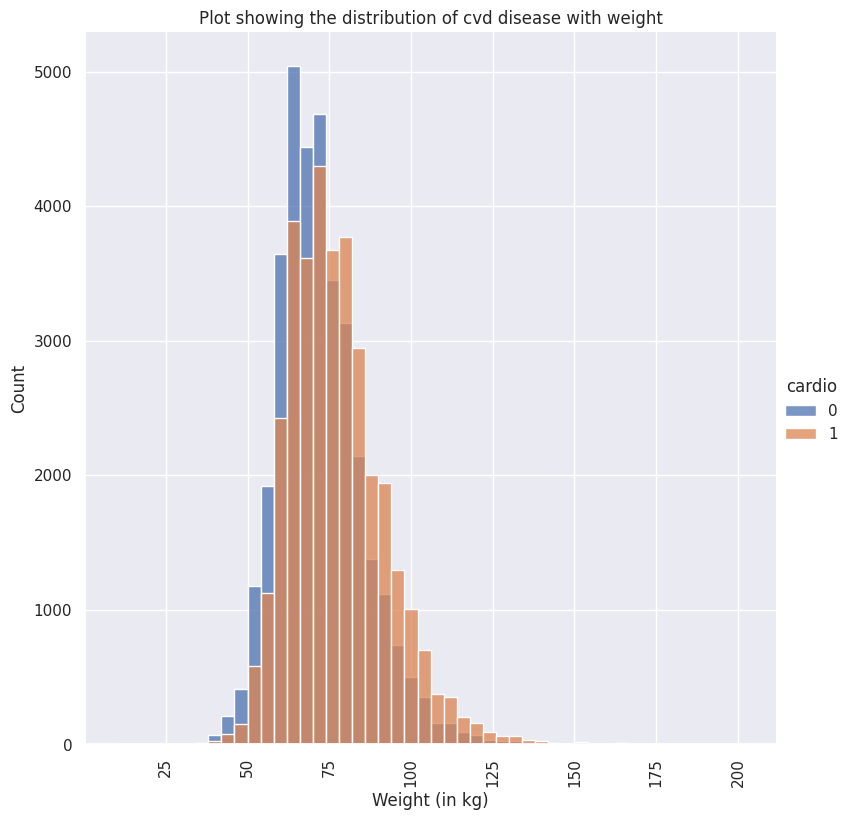

In [ ]:
sns.set(font_scale=1.0)
plt.figure(dpi=100)
sns.FacetGrid(data,hue="cardio",height=8).map(sns.histplot,'weight',binwidth=4.0).add_legend()
plt.title("Plot showing the distribution of cvd disease with weight")
plt.xticks(rotation=90)
plt.xlabel("Weight (in kg)")
plt.show()

Histogram showing relative frequencies of the people with and without CVD,in different systolic blood pressure brackets.


<Figure size 640x480 with 0 Axes>

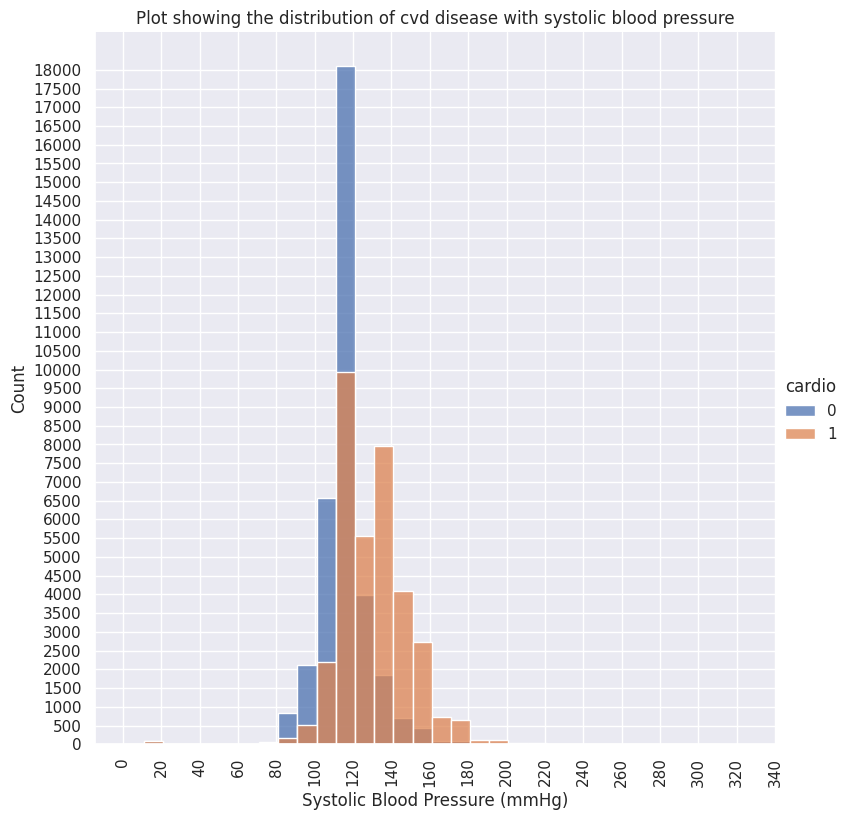

In [ ]:
data2 = data.copy(deep=True)
data2.drop(data[data['ap_hi']>350].index,inplace=True)
data2.drop(data[data['ap_hi']<0].index,inplace=True)
sns.set(font_scale=1.0)
plt.figure(dpi=100)
sns.FacetGrid(data2,hue="cardio",height=8).map(sns.histplot,'ap_hi',binwidth=10.0).add_legend()
plt.title("Plot showing the distribution of cvd disease with systolic blood pressure")
plt.xticks(rotation=90)
plt.xticks(np.arange(0,350,20))
plt.yticks(np.arange(0,18500,500))
plt.xlabel("Systolic Blood Pressure (mmHg)")
plt.show()

Histogram showing relative frequencies of the people with and without CVD,in different diastolic blood pressure brackets.


<Figure size 640x480 with 0 Axes>

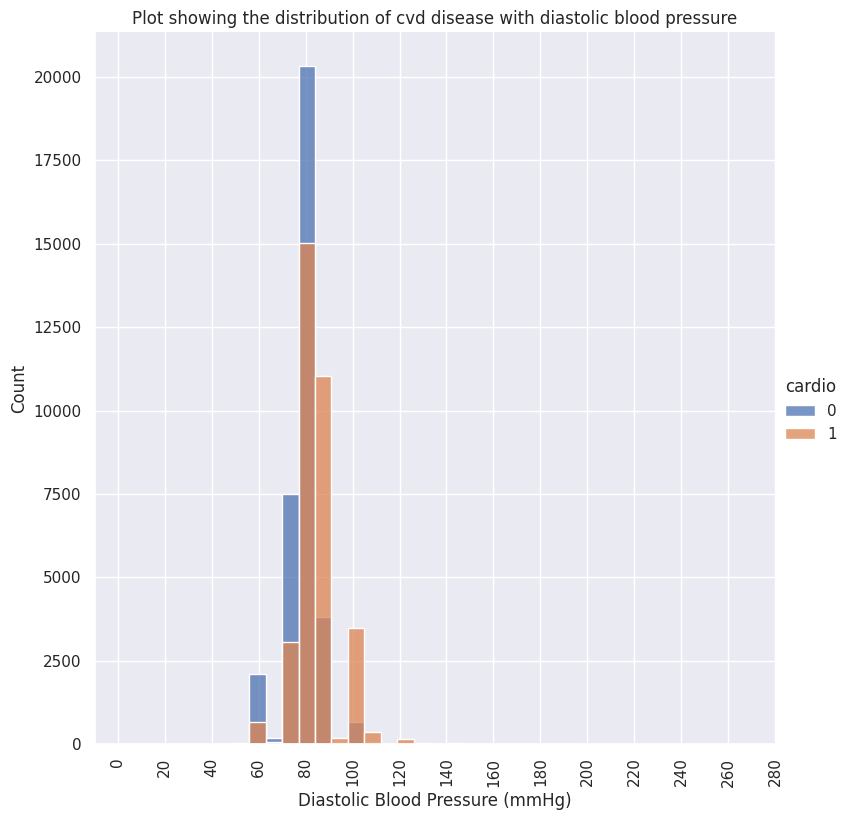

In [ ]:
data3 = data.copy(deep=True)
data3.drop(data[data['ap_lo']>350].index,inplace=True)
data3.drop(data[data['ap_lo']<0].index,inplace=True)
sns.set(font_scale=1.0)
plt.figure(dpi=100)
sns.FacetGrid(data3,hue="cardio",height=8).map(sns.histplot,'ap_lo',binwidth=7.0).add_legend()
plt.title("Plot showing the distribution of cvd disease with diastolic blood pressure")
plt.xticks(rotation=90)
plt.xticks(np.arange(0,300,20))
# plt.yticks(np.arange(0,18500,500))
plt.xlabel("Diastolic Blood Pressure (mmHg)")
plt.show()

Histogram showing relative frequencies of the people with and without CVD,in different ranges of Pulse Pressure

<Figure size 640x480 with 0 Axes>

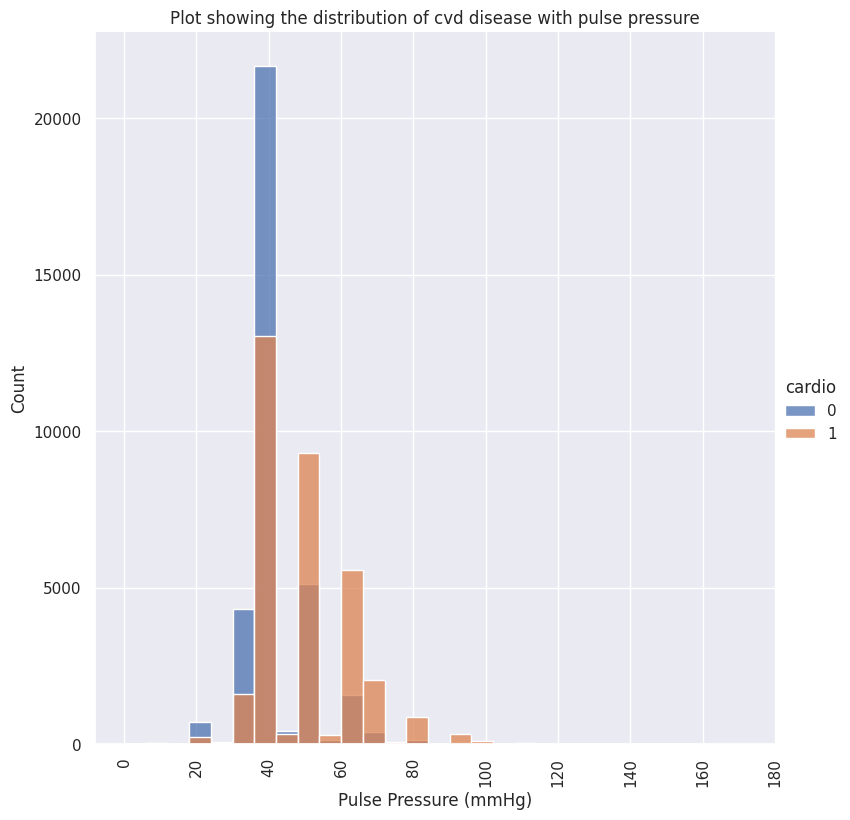

In [ ]:
data4 = data.copy(deep=True)
data4.drop(data[data['PP']>200].index,inplace=True)
data4.drop(data[data['PP']<0].index,inplace=True)
sns.set(font_scale=1.0)
plt.figure(dpi=100)
sns.FacetGrid(data4,hue="cardio",height=8).map(sns.histplot,'PP',binwidth=6.0).add_legend()
plt.title("Plot showing the distribution of cvd disease with pulse pressure")
plt.xticks(rotation=90)
plt.xticks(np.arange(0,200,20))
plt.xlabel("Pulse Pressure (mmHg)")
plt.show()

Histogram showing relative frequencies of the people with and without CVD,in different ranges of Mean Arterial Pressure (MAP)

In [ ]:
data5 = data.copy(deep=True)
data5.drop(data[data['MAP']>200].index,inplace=True)
data5.drop(data[data['MAP']<0].index,inplace=True)
sns.set(font_scale=1.0)
plt.figure(dpi=100)
sns.FacetGrid(data5,hue="cardio",height=8).map(sns.histplot,'MAP',binwidth=6.0).add_legend()
plt.title("Plot showing the distribution of cvd disease with Mean Artrial pressure")
plt.xticks(rotation=90)
plt.xticks(np.arange(0,200,20))
plt.xlabel("Mean Artrial Pressure (mmHg)")
plt.show()

### **Pie-Charts**

# *Gender*

Pie-Chart percenatges of female with and without CVD

In [ ]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['gender'] == 1)]),len(data[(data['cardio'] == 1) & (data['gender'] == 1)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of females with and without CVD",bbox={'facecolor':'0.8', 'pad':5})
plt.show()


Plot Showing percentage of males with and without CVD

In [ ]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['gender'] == 2)]),len(data[(data['cardio'] == 1) & (data['gender'] == 2)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of males with and without CVD",bbox={'facecolor':'0.8', 'pad':5})
plt.show()


# *Cholestrol*

% age of people with normal cholestrol,having CVD or not having CVD

In [ ]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['cholesterol'] == 1)]),len(data[(data['cardio'] == 1) & (data['cholesterol'] == 1)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of people with and without CVD having normal cholestrol levels",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

% age of people with above-normal cholestrol,having CVD or not having CVD

In [ ]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['cholesterol'] == 2)]),len(data[(data['cardio'] == 1) & (data['cholesterol'] == 2)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of people with and without CVD having above-normal cholestrol levels",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

% age of people with well-above-normal cholestrol,having CVD or not having CVD

In [ ]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['cholesterol'] == 3)]),len(data[(data['cardio'] == 1) & (data['cholesterol'] == 3)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of people with and without CVD having well-above-normal cholestrol levels",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

# *Glucose*

% age of people with normal glucose,having CVD or not having CVD

In [ ]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['gluc'] == 1)]),len(data[(data['cardio'] == 1) & (data['gluc'] == 1)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of people with and without CVD having normal glucose levels",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

% age of people with above-normal glucose,having CVD or not having CVD

In [ ]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['gluc'] == 2)]),len(data[(data['cardio'] == 1) & (data['gluc'] == 2)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of people with and without CVD having above-normal glucose levels",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

% age of people with well-above-normal glucose,having CVD or not having CVD

In [ ]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['gluc'] == 3)]),len(data[(data['cardio'] == 1) & (data['gluc'] == 3)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of people with and without CVD having well above normal glucose levels",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

# *Life-Style*

% age of people with lazy lifestyle,having CVD or not having CVD

In [ ]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['active'] == 0)]),len(data[(data['cardio'] == 1) & (data['active'] == 0)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of people with and without CVD having low activity levels",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

% age of people with active lifestyle,having CVD or not having CVD

In [ ]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['active'] == 1)]),len(data[(data['cardio'] == 1) & (data['active'] == 1)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of people with and without CVD having high activity levels",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

# **Analysis of the dataset**

**People with  no CVD**

In [ ]:
mask_0 = (data['cardio']==0)


print("People with no CVD")

# Various Factors for patients without CVD
age_max_no_cvd =  float(data.loc[mask_0,['age']].max())
age_min_no_cvd = float(data.loc[mask_0,['age']].min())
age_mean_no_cvd = float(data.loc[mask_0,['age']].mean())
age_median_no_cvd = float(data.loc[mask_0,['age']].median())

weight_max_no_cvd =  float(data.loc[mask_0,['weight']].max())
weight_min_no_cvd = float(data.loc[mask_0,['weight']].min())
weight_mean_no_cvd = float(data.loc[mask_0,['weight']].mean())
weight_median_no_cvd = float(data.loc[mask_0,['weight']].median())


sys_max_no_cvd =  float(data.loc[mask_0,['ap_hi']].max())
sys_min_no_cvd = float(data.loc[mask_0,['ap_hi']].min())
sys_mean_no_cvd = float(data.loc[mask_0,['ap_hi']].mean())
sys_median_no_cvd = float(data.loc[mask_0,['ap_hi']].median())


dys_max_no_cvd =  float(data.loc[mask_0,['ap_lo']].max())
dys_min_no_cvd = float(data.loc[mask_0,['ap_lo']].min())
dys_mean_no_cvd = float(data.loc[mask_0,['ap_lo']].mean())
dys_median_no_cvd = float(data.loc[mask_0,['ap_lo']].median())



pp_max_no_cvd =  float(data.loc[mask_0,['PP']].max())
pp_min_no_cvd = float(data.loc[mask_0,['PP']].min())
pp_mean_no_cvd = float(data.loc[mask_0,['PP']].mean())
pp_median_no_cvd = float(data.loc[mask_0,['PP']].median())



map_max_no_cvd =  float(data.loc[mask_0,['MAP']].max())
map_min_no_cvd = float(data.loc[mask_0,['MAP']].min())
map_mean_no_cvd = float(data.loc[mask_0,['MAP']].mean())
map_median_no_cvd = float(data.loc[mask_0,['MAP']].median())



data_no_cvd  =       [ ['Age',age_max_no_cvd,age_min_no_cvd,age_mean_no_cvd,age_median_no_cvd],
                       ['Weight',weight_max_no_cvd,weight_min_no_cvd,weight_mean_no_cvd,weight_median_no_cvd],
                       ['Systolic BP (ap_hi)',sys_max_no_cvd,sys_min_no_cvd,sys_mean_no_cvd,sys_median_no_cvd],
                       ['Dystolic BP(ap_lo)',dys_max_no_cvd,dys_min_no_cvd,dys_mean_no_cvd,dys_median_no_cvd],
                       ['Pulse Pressure (PP)',pp_max_no_cvd,pp_min_no_cvd,pp_mean_no_cvd,pp_median_no_cvd],
                       ['Mean Arterial Pressure (MAP)',map_max_no_cvd,map_min_no_cvd,map_mean_no_cvd,map_median_no_cvd]
                     ]



analysis_df_no_cvd = pd.DataFrame(data_no_cvd,columns = ['Parameter','Max','Min','Mean','Median'])
analysis_df_no_cvd

**People with CVD**

In [ ]:
mask_1 = (data['cardio']==1)


print("People with CVD")
# Various Factors for patients with CVD
age_max_cvd =  float(data.loc[mask_1,['age']].max())
age_min_cvd = float(data.loc[mask_1,['age']].min())
age_mean_cvd = float(data.loc[mask_1,['age']].mean())
age_median_cvd = float(data.loc[mask_1,['age']].median())

weight_max_cvd =  float(data.loc[mask_1,['weight']].max())
weight_min_cvd = float(data.loc[mask_1,['weight']].min())
weight_mean_cvd = float(data.loc[mask_1,['weight']].mean())
weight_median_cvd = float(data.loc[mask_1,['weight']].median())


sys_max_cvd =  float(data.loc[mask_1,['ap_hi']].max())
sys_min_cvd = float(data.loc[mask_1,['ap_hi']].min())
sys_mean_cvd = float(data.loc[mask_1,['ap_hi']].mean())
sys_median_cvd = float(data.loc[mask_1,['ap_hi']].median())


dys_max_cvd =  float(data.loc[mask_1,['ap_lo']].max())
dys_min_cvd = float(data.loc[mask_1,['ap_lo']].min())
dys_mean_cvd = float(data.loc[mask_1,['ap_lo']].mean())
dys_median_cvd = float(data.loc[mask_1,['ap_lo']].median())



pp_max_cvd =  float(data.loc[mask_1,['PP']].max())
pp_min_cvd = float(data.loc[mask_1,['PP']].min())
pp_mean_cvd = float(data.loc[mask_1,['PP']].mean())
pp_median_cvd = float(data.loc[mask_1,['PP']].median())



map_max_cvd =  float(data.loc[mask_1,['MAP']].max())
map_min_cvd = float(data.loc[mask_1,['MAP']].min())
map_mean_cvd = float(data.loc[mask_1,['MAP']].mean())
map_median_cvd = float(data.loc[mask_1,['MAP']].median())



data_cvd  =       [ ['Age',age_max_cvd,age_min_cvd,age_mean_cvd,age_median_cvd],
                       ['Weight',weight_max_cvd,weight_min_cvd,weight_mean_cvd,weight_median_cvd],
                       ['Systolic BP (ap_hi)',sys_max_cvd,sys_min_cvd,sys_mean_cvd,sys_median_cvd],
                       ['Dystolic BP(ap_lo)',dys_max_cvd,dys_min_cvd,dys_mean_cvd,dys_median_cvd],
                       ['Pulse Pressure (PP)',pp_max_cvd,pp_min_cvd,pp_mean_cvd,pp_median_cvd],
                       ['Mean Arterial Pressure (MAP)',map_max_cvd,map_min_cvd,map_mean_cvd,map_median_cvd]
                     ]



analysis_df_cvd = pd.DataFrame(data_cvd,columns = ['Parameter','Max','Min','Mean','Median'])
analysis_df_cvd

# Outlier Detction and Cleaning

**Z-Score**

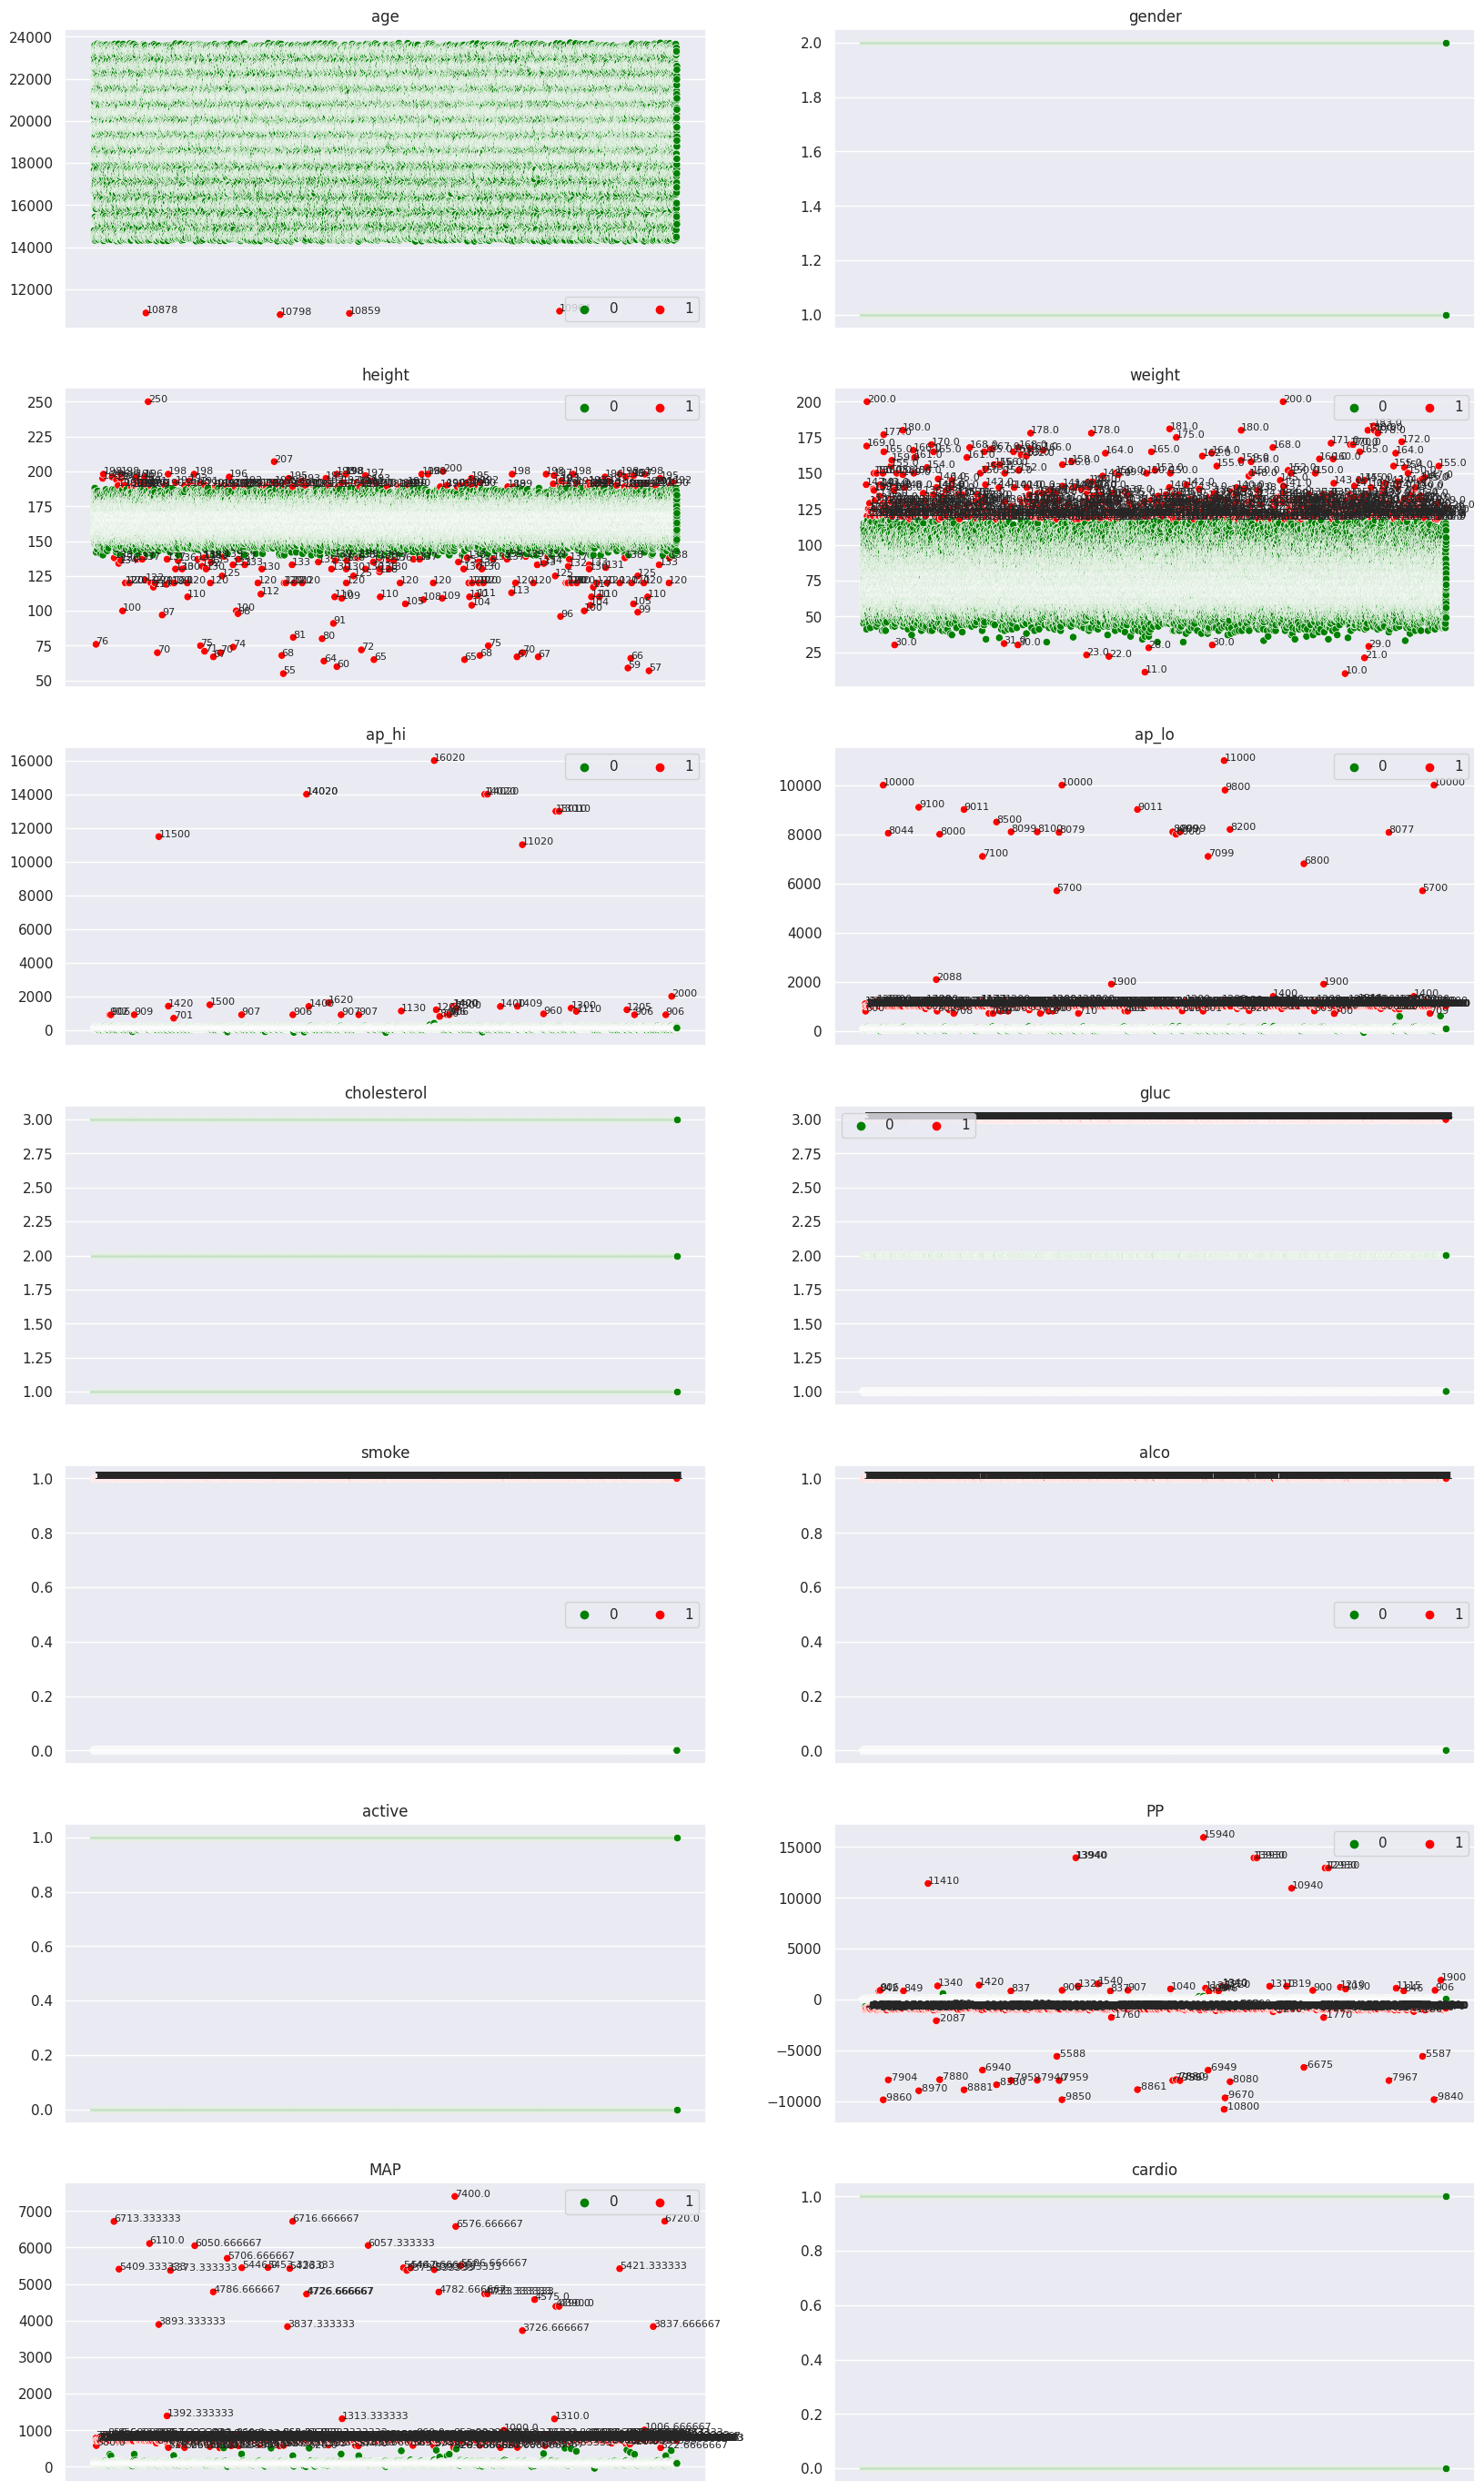

In [ ]:
# Function for Z-score outlier detection
def zscore_outlier(x, lb, ub):
    zscore = ((x - x.mean()) / x.std()).copy()
    result_ = pd.Series([0] * len(x))
    result_[(zscore < lb) | (zscore > ub)] = 1
    return result_

# PLOTTING A SCATTER PLOT AND HIGHLIGHTING THE OUTLIERS DETECTED BY Z-SCORE METHOD
num_columns = len(data.columns)
num_rows = (num_columns + 1) // 2  # Calculate the number of rows needed

fig, ax = plt.subplots(num_rows, 2, figsize=(20, num_rows * 5))
row = col = 0

for n, i in enumerate(data.columns):
    if (n % 2 == 0) and (n > 0):
        row += 1
        col = 0
    outliers = zscore_outlier(data[i], -3, 3)

    if sum(outliers) == 0:
        sns.scatterplot(x=np.arange(len(data[i])), y=data[i], ax=ax[row, col], legend=False, color='green')
    else:
        sns.scatterplot(x=np.arange(len(data[i])), y=data[i], ax=ax[row, col], hue=outliers, palette=['green', 'red'])
    for x, y in zip(np.arange(len(data[i]))[outliers == 1], data[i][outliers == 1]):
        ax[row, col].text(x=x, y=y, s=y, fontsize=8)
    ax[row, col].set_ylabel("")
    ax[row, col].set_title(i)
    ax[row, col].xaxis.set_visible(False)
    if sum(outliers) > 0:
        ax[row, col].legend(ncol=2)
    col += 1

# Remove unused subplots
for r in range(row+1, num_rows):
    for c in range(2):
        ax[r, c].axis('off')

plt.show()

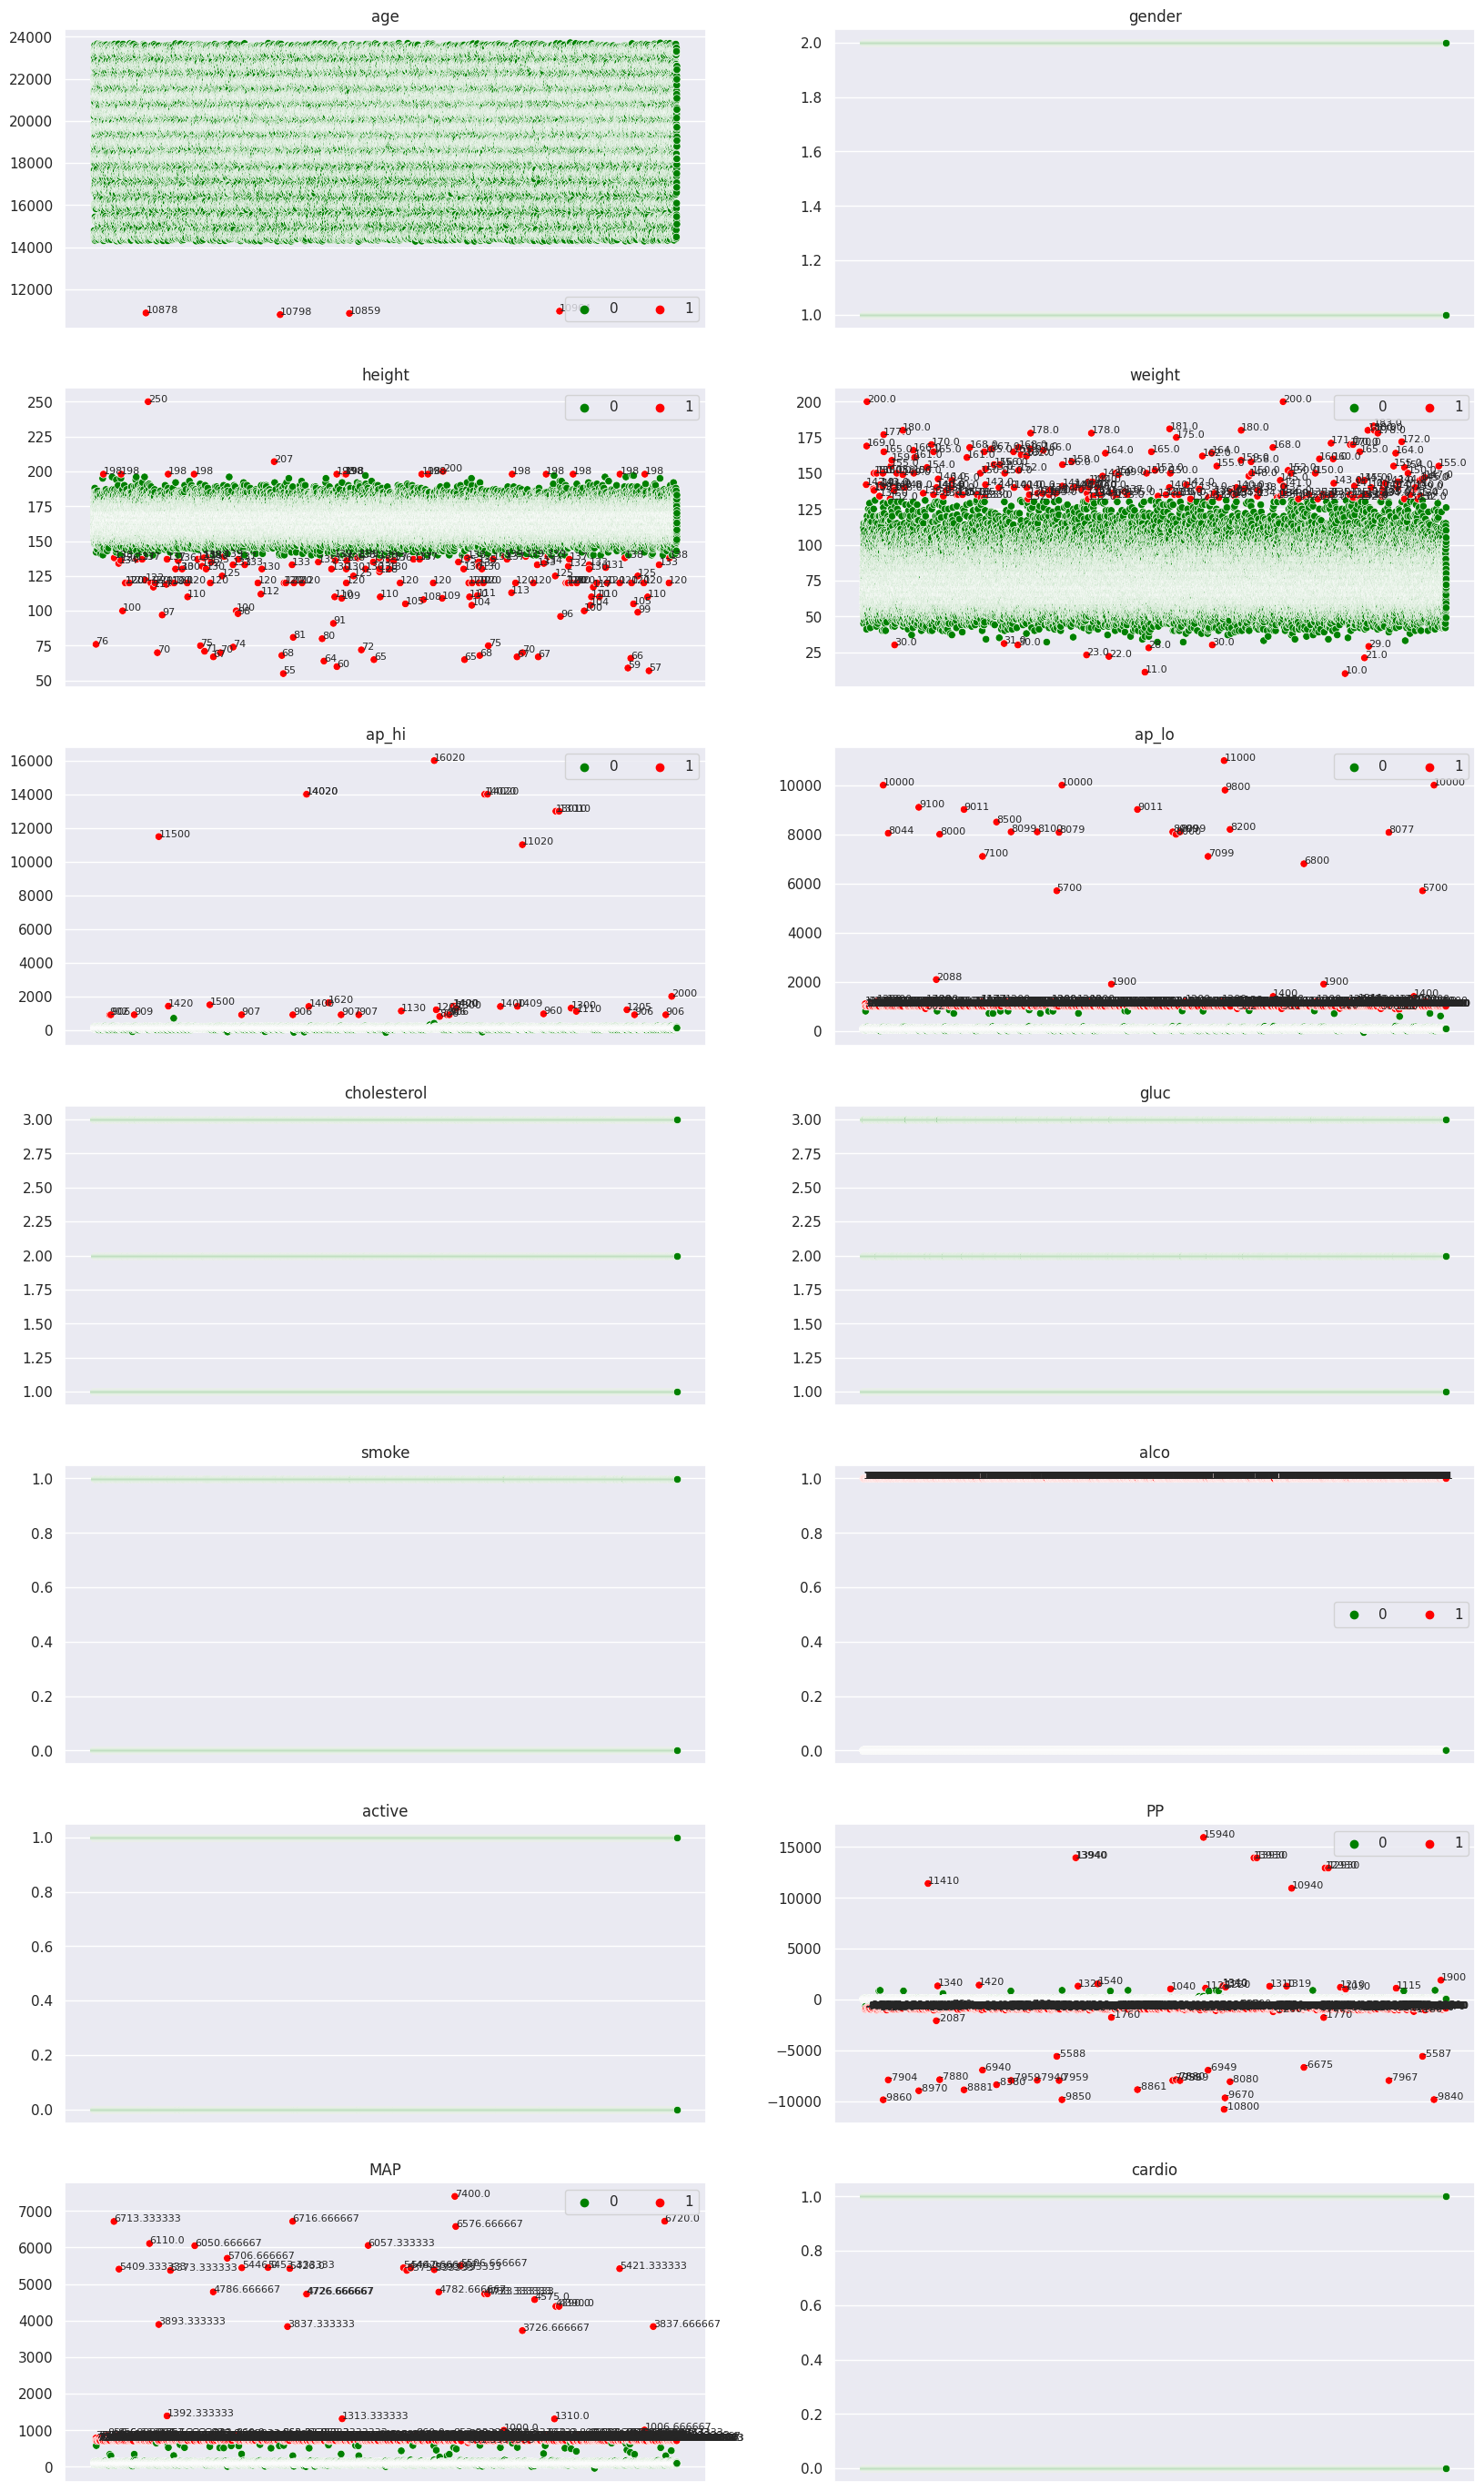

In [ ]:


# Function for Z-score outlier detection
def zscore_outlier(x, lb, ub):
    zscore = ((x - x.mean()) / x.std()).copy()
    result_ = pd.Series([0] * len(x))
    result_[(zscore < lb) | (zscore > ub)] = 1
    return result_

# Assuming 'data' is your DataFrame

# PLOTTING A SCATTER PLOT AND HIGHLIGHTING THE OUTLIERS DETECTED BY Z-SCORE METHOD
num_columns = len(data.columns)
num_rows = (num_columns + 1) // 2  # Calculate the number of rows needed

fig, ax = plt.subplots(num_rows, 2, figsize=(20, num_rows * 5))
row = col = 0

# Create a new DataFrame to store the filtered data
filtered_data = data.copy()

for n, i in enumerate(data.columns):
    if (n % 2 == 0) and (n > 0):
        row += 1
        col = 0
    outliers = zscore_outlier(data[i], -3, 4)

    # Remove outliers from the DataFrame
    filtered_data[i] = np.where(outliers == 1, np.nan, data[i])

    if sum(outliers) == 0:
        sns.scatterplot(x=np.arange(len(data[i])), y=data[i], ax=ax[row, col], legend=False, color='green')
    else:
        sns.scatterplot(x=np.arange(len(data[i])), y=data[i], ax=ax[row, col], hue=outliers, palette=['green', 'red'])
    for x, y in zip(np.arange(len(data[i]))[outliers == 1], data[i][outliers == 1]):
        ax[row, col].text(x=x, y=y, s=y, fontsize=8)
    ax[row, col].set_ylabel("")
    ax[row, col].set_title(i)
    ax[row, col].xaxis.set_visible(False)
    if sum(outliers) > 0:
        ax[row, col].legend(ncol=2)
    col += 1

# Remove unused subplots
for r in range(row+1, num_rows):
    for c in range(2):
        ax[r, c].axis('off')

plt.show()


In [ ]:

# Display the filtered data
print("Filtered Data:")
filtered_data = filtered_data.dropna()
print(filtered_data)


Filtered Data:
           age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0      18393.0     2.0   168.0    62.0  110.0   80.0          1.0   1.0   
1      20228.0     1.0   156.0    85.0  140.0   90.0          3.0   1.0   
2      18857.0     1.0   165.0    64.0  130.0   70.0          3.0   1.0   
3      17623.0     2.0   169.0    82.0  150.0  100.0          1.0   1.0   
4      17474.0     1.0   156.0    56.0  100.0   60.0          1.0   1.0   
...        ...     ...     ...     ...    ...    ...          ...   ...   
69994  21074.0     1.0   165.0    80.0  150.0   80.0          1.0   1.0   
69995  19240.0     2.0   168.0    76.0  120.0   80.0          1.0   1.0   
69996  22601.0     1.0   158.0   126.0  140.0   90.0          2.0   2.0   
69998  22431.0     1.0   163.0    72.0  135.0   80.0          1.0   2.0   
69999  20540.0     1.0   170.0    72.0  120.0   80.0          2.0   1.0   

       smoke  alco  active    PP         MAP  cardio  
0        0.0   0.0     1.0  3

## `**LOF**`

In [ ]:
data_lof = data.copy(deep=True)
lof = LocalOutlierFactor(n_neighbors=20,contamination=0.20)
outlier_scores = lof.fit_predict(data_lof)


data_lof["LOF_Score"] = outlier_scores
data_lof = data_lof[data_lof["LOF_Score"]>=0]
data_lof.drop(columns=['LOF_Score'],inplace=True)
display(data_lof)

<ipython-input-42-639b86638c56>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lof.drop(columns=['LOF_Score'],inplace=True)


age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
1      20228       1     156    85.0    140     90            3     1      0   
2      18857       1     165    64.0    130     70            3     1      0   
3      17623       2     169    82.0    150    100            1     1      0   
4      17474       1     156    56.0    100     60            1     1      0   
5      21914       1     151    67.0    120     80            2     2      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
69993  19699       1     172    70.0    130     90            1     1      0   
69994  21074       1     165    80.0    150     80            1     1      0   
69995  19240       2     168    76.0    120     80            1     1      1   
69998  22431       1     163    72.0    135     80            1     2      0   
69999  20540       1     170    72.0    120     80            2     1      0   

       alco  active  PP         MAP  cardio  
1         0       1  50  106.666667       1  
2         0       0  60   90.000000       1  
3         0       1  50  116.666667       1  
4         0       0  40   73.333333       0  
5         0       0  40   93.333333       0  
...     ...     ...  ..         ...     ...  
69993     0       1  40  103.333333       1  
69994     0       1  70  103.333333       1  
69995     0       1  40   93.333333       0  
69998     0       0  55   98.333333       1  
69999     0       1  40   93.333333       0  

[56000 rows x 14 columns]

# **Outlier detection using IQR**

Applying of IQR on the features, that are skewed in nature.
Hence we would apply IQR on Pulse Pressure (PP) and Dystolic Blood Pressure (DBP).

### *IQR on PP*

In [ ]:
data_IQR_PP = data.copy(deep=True)

Quartile1 = data_IQR_PP["PP"].quantile(0.25)
Quartile3 = data_IQR_PP["PP"].quantile(0.75)

IQR  = Quartile3-Quartile1

UpperLimit = Quartile3 + 1.5*IQR
LowerLimit = Quartile1 - 1.5*IQR

data_IQR_PP = data_IQR_PP[data_IQR_PP['PP']>=LowerLimit]
data_IQR_PP = data_IQR_PP[data_IQR_PP['PP']<=UpperLimit]
print(data_IQR_PP.shape)

## *IQR on DBP*

In [ ]:
data_IQR_DBP = data.copy(deep=True)

Quartile1 = data_IQR_DBP["ap_lo"].quantile(0.25)
Quartile3 = data_IQR_DBP["ap_lo"].quantile(0.75)

IQR  = Quartile3-Quartile1

UpperLimit = Quartile3 + 1.5*IQR
LowerLimit = Quartile1 - 1.5*IQR

data_IQR_DBP = data_IQR_DBP[data_IQR_PP['ap_lo']>=LowerLimit]
data_IQR_DBP = data_IQR_DBP[data_IQR_PP['ap_lo']<=UpperLimit]
print(data_IQR_DBP.shape)

**t-SNE seprability visualization**

In [ ]:
def tsne_vis(data):
    data2 = data.copy(deep=True)
    X=data.iloc[:,:-1]
    y=data.iloc[:,-1]
    tsne = TSNE(n_components=2, n_iter = 1000, perplexity = 300, random_state=42)
    # Fit and transform your data to the lower-dimensional space
    X_tsne = tsne.fit_transform(X)

    # Now, X_tsne contains the lower-dimensional representation of your data

    # Visualize the t-SNE results (scatter plot)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)  # Assuming 'y' is your target variable for coloring points
    plt.title("t-SNE Visualization")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")

## **Models**

**Generic Codes**


*One_hot_encoding*

In [ ]:
def one_hot_encoding(data):
  data2 = data.copy(deep=True)
  categorical_columns = ['gender','cholesterol','gluc','smoke','alco','active']
  data2 = pd.get_dummies(data, columns=categorical_columns,drop_first=True)
  temp=data2.pop('cardio')
  data2['cardio']=temp
  return data2

*K-fold on PCA*

In [ ]:
def find_optimal_pca_components(X_train,Y_train,model):
    n_components = list(range(1, X_train.shape[1] + 1))
    pca = PCA()
    # Create a pipeline with PCA and the classifier
    pipeline = Pipeline([
        ('pca', PCA()),
        ('model', model)
    ])

    # Define the grid of parameters to search over
    param_grid = {
        'pca__n_components': n_components,
    }

    grid_search = GridSearchCV(pipeline, param_grid, cv=10)

    grid_search.fit(X_train, Y_train)

    print(f'Optimal number of components: {grid_search.best_params_["pca__n_components"]}')
    print(f'Cross-validation score: {grid_search.best_score_}')
    return (grid_search.best_params_["pca__n_components"],grid_search.best_score_)

*Train-Test-Split (normal data)*

In [3]:
def find_train_test_split(data,test_size):
  data2=data.copy(deep=True)
  X=data.iloc[:,:-1]
  y=data.iloc[:,-1]
  X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=10)
  ct = ColumnTransformer([('x', StandardScaler(),[0,2,3,4,5,11,12])], remainder ='passthrough')
  X_train = ct.fit_transform(X_train)
  X_test = ct.transform(X_test)
  return (X_train,X_test,Y_train,Y_test)

*Naive Bayes*

In [ ]:
def naive_bayes(X_train,X_test,y_train,y_test):


# Create and train the Gaussian Naive Bayes model
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = gnb.predict(X_test)
    y_pred_train = gnb.predict(X_train)

    accuracy = metrics.accuracy_score(y_train, y_pred_train)
    recall = metrics.recall_score(y_train,y_pred_train)
    f1 = metrics.f1_score(y_train,y_pred_train)
    precision = metrics.precision_score(y_train,y_pred_train)
    print("Training Data Metrics : ")
    print("Accuracy:", accuracy)
    print("Recall:", recall)
    print("f1:", f1)
    print("Precision:", precision)
    print()
    # Evaluate the model
    print("Testing Data Metrics")
    accuracy = metrics.accuracy_score(y_test, y_pred)
    recall = metrics.recall_score(y_test,y_pred)
    f1 = metrics.f1_score(y_test,y_pred)
    precision = metrics.precision_score(y_test,y_pred)

    print("Accuracy:", accuracy)
    print("Recall:", recall)
    print("f1:", f1)
    print("Precision:", precision)


*ROC Curve*

In [ ]:
def plot_roc(X_train,X_test,Y_Train,Y_Test,model):
  model.fit(X_train,Y_train)
  y_pred_proba = model.predict_proba(X_test)[::,1]
  fpr,tpr,threshold = metrics.roc_curve(Y_test,y_pred_proba)
  plt.plot(fpr,tpr)
  plt.ylabel("True Positive Rate")
  plt.xlabel("False Positive Rate")
  plt.title("ROC Curve")
  plt.show()

*Logistic Regression*

In [ ]:
def logistic_regression(X_Train,X_Test,Y_Train,Y_Test,threshold_probability):
  model = LogisticRegression()
  model.fit(X_train,Y_train)
  probs_train = model.predict_proba(X_train)
  y_predict_train = (probs_train[:,1]>=threshold_probability).astype('int')

  probs_test = model.predict_proba(X_test)
  y_predict_test = (probs_test[:,1]>=threshold_probability).astype('int')

  print("---------------Training Data Metrics-----------------------")
  print("Accuracy  = ",metrics.accuracy_score(y_predict_train,Y_train))
  print("Precision = ",metrics.precision_score(y_predict_train,Y_train))
  print("Recall = ",metrics.recall_score(y_predict_train,Y_train))
  print("F1 Score = ",metrics.f1_score(y_predict_train,Y_train))

  print(metrics.confusion_matrix(y_predict_train,Y_train))


  print("-------------------------Testing Data Metrics---------------------")
  print("Accuracy  = ",metrics.accuracy_score(y_predict_test,Y_test))
  print("Precision = ",metrics.precision_score(y_predict_test,Y_test))
  print("Recall = ",metrics.recall_score(y_predict_test,Y_test))
  print("F1 Score = ",metrics.f1_score(y_predict_test,Y_test))

  print(metrics.confusion_matrix(y_predict_test,Y_test))

*PCA*

In [ ]:
def find_pca(X_train,X_test,Y_train,Y_test,model):
  pca = PCA()
  pca.n_components=find_optimal_pca_components(X_train,Y_train,model)[0]
  pca.fit(X_train)
  X_train_pca = pca.transform(X_train)
  X_test_pca = pca.transform(X_test)
  return (X_train_pca,X_test_pca,Y_train,Y_test)

SVM

In [6]:
def SVM_generic(data,target_column,_kernel):
  # target_column = 'cardio'
  svm_data=data.copy(deep=True)
  X = svm_data.drop(target_column, axis=1)
  y = svm_data[target_column]

  #train slpit fn
  X_train,X_test,y_train,y_test = find_train_test_split(svm_data,0.3)

  # svm_model = SVC(kernel='linear')  # You can choose different kernels like 'rbf', 'poly', etc.
  svm_model = SVC(kernel=_kernel)

  # Train the model
  svm_model.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = svm_model.predict(X_test)

  # Evaluate the model
  accuracy = accuracy_score(y_test, y_pred)
  conf_matrix = confusion_matrix(y_test, y_pred)
  classification_rep = classification_report(y_test, y_pred)

  return (accuracy,conf_matrix,classification_rep)


**Naive Bayes**

*Z-Score*

*LOF*

Standerdized Data

In [ ]:
X_train,X_test,Y_train,Y_test = find_train_test_split(data_lof,0.3)
naive_bayes(X_train,X_test,Y_train,Y_test)

Standerdized Data + PCA

In [ ]:
X_train,X_test,Y_train,Y_test = find_train_test_split(data_lof,0.3)
X_train,X_test,Y_train,Y_test  = find_pca(X_train,X_test,Y_train,Y_test,GaussianNB())
naive_bayes(X_train,X_test,Y_train,Y_test)

Standerdized + One Hot Encoded Data

In [ ]:
data_lof_one_hot = one_hot_encoding(data_lof)
X_train,X_test,Y_train,Y_test = find_train_test_split(data_lof_one_hot,0.3)
naive_bayes(X_train,X_test,Y_train,Y_test)

Standerdized + One Hot Encoded Data + PCA

In [ ]:
data_lof_one_hot_pca = one_hot_encoding(data_lof)
X_train,X_test,Y_train,Y_test = find_train_test_split(data_lof_one_hot,0.3)
X_train,X_test,Y_train,Y_test  = find_pca(X_train,X_test,Y_train,Y_test,GaussianNB())
naive_bayes(X_train,X_test,Y_train,Y_test)

**Logistic Regression**

*LOF*

Plotting ROC Curve

In [ ]:
X_train,X_test,Y_train,Y_test = find_train_test_split(data_lof,0.3)
plot_roc(X_train,X_test,Y_train,Y_test,LogisticRegression())

Standerdized Data

In [ ]:
X_train,X_test,Y_train,Y_test = find_train_test_split(data_lof,0.3)
logistic_regression(X_train,X_test,Y_train,Y_test,0.5)

Standarderdized Data + PCA

In [ ]:
X_train,X_test,Y_train,Y_test = find_train_test_split(data_lof,0.3)
X_train,X_test,Y_train,Y_test  = find_pca(X_train,X_test,Y_train,Y_test,LogisticRegression())
logistic_regression(X_train,X_test,Y_train,Y_test,0.5)

Standarderdized Data + One Hot Encoded Data

In [ ]:
data_lof_one_hot = one_hot_encoding(data_lof)
X_train,X_test,Y_train,Y_test = find_train_test_split(data_lof_one_hot,0.3)
logistic_regression(X_train,X_test,Y_train,Y_test,0.5)

Standerdized + One Hot Encoded Data + PCA

In [ ]:
data_lof_one_hot_pca = one_hot_encoding(data_lof)
X_train,X_test,Y_train,Y_test = find_train_test_split(data_lof_one_hot,0.3)
X_train,X_test,Y_train,Y_test  = find_pca(X_train,X_test,Y_train,Y_test,GaussianNB())
logistic_regression(X_train,X_test,Y_train,Y_test,0.5)

**Support Vector Machine**


Naive SVM



In [ ]:
SVM_Naive = SVM_generic(data,'cardio','linear')